In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
traffic_df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [3]:
traffic_df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


### Description of the column categories 
- holiday: Categorical US National holidays plus regional holiday, Minnesota State Fair
- temp: Numeric Average temp in kelvin
- rain_1h: numeric amount in mm of rain that occured in the hour
- snow_1h: numeric amount in mm of snow that occurred in the hour 
- clouds_all: numeric percentage of cloud cover
- weather_main: categorical short textual description of the current weather
- weather_description: categorical longer textual description of the current weather
- date_time: DateTime hour of the data collected in local CST Time 
- traffic_volume:  Numeric Hourly I-94 ATR 301 reported westbound traffic volume

In [4]:
# replace holiday with numeric values to represent a holiday = 1 and non-holiday = 0
traffic_df["holiday"] = traffic_df["holiday"].replace('None', 0)
traffic_df["holiday"] = traffic_df["holiday"].replace("Columbus Day", 1)
traffic_df["holiday"] = traffic_df["holiday"].replace("Veterans Day", 1)
traffic_df["holiday"] = traffic_df["holiday"].replace("Thanksgiving Day", 1)
traffic_df["holiday"] = traffic_df["holiday"].replace("Christmas Day", 1)
traffic_df["holiday"] = traffic_df["holiday"].replace("New Years Day", 1)
traffic_df["holiday"] = traffic_df["holiday"].replace("Washingtons Birthday", 1)
traffic_df["holiday"] = traffic_df["holiday"].replace("Memorial Day", 1)
traffic_df["holiday"] = traffic_df["holiday"].replace("Independence Day", 1)
traffic_df["holiday"] = traffic_df["holiday"].replace("Labor Day", 1)
traffic_df["holiday"] = traffic_df["holiday"].replace("Martin Luther King Jr Day", 1)
traffic_df["holiday"] = traffic_df["holiday"].replace("State Fair", 1)

In [5]:
traffic_df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,0,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,0,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,0,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,0,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,0,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


(array([  10.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,   99.,  936., 2205., 3324., 6422., 8120.,
        5700., 8685., 8835., 3583.,  285.]),
 array([  0.    ,   6.2014,  12.4028,  18.6042,  24.8056,  31.007 ,
         37.2084,  43.4098,  49.6112,  55.8126,  62.014 ,  68.2154,
         74.4168,  80.6182,  86.8196,  93.021 ,  99.2224, 105.4238,
        111.6252, 117.8266, 124.028 , 130.2294, 136.4308, 142.6322,
        148.8336, 155.035 , 161.2364, 167.4378, 173.6392, 179.8406,
        186.042 , 192.2434, 198.4448, 204.6462, 210.8476, 217.049 ,
        223.2504, 229.4518, 235.6532, 241.8546, 248.056 , 254.2574,
        260.4588, 266.6602, 272.8616, 279.063 , 285.2644, 291.4658,
        297.6672, 303.8686, 310.07  ]),
 <a list of 50 P

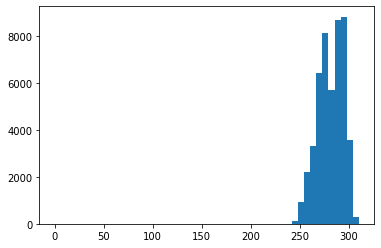

In [6]:
plt.hist(traffic_df["temp"], bins = 50)

In [7]:
print(traffic_df["temp"][0])

288.28


In [8]:
def to_farenheit(X): 
    F_x = X - 273.15
    F_x = ((9/5) * (F_x)) + 32.0
    
    return float(F_x)

In [9]:
# Removing 0 Kelvin values
traffic_df = traffic_df[traffic_df['temp'] > 0]
traffic_df["temp"] = traffic_df['temp'].apply(to_farenheit)

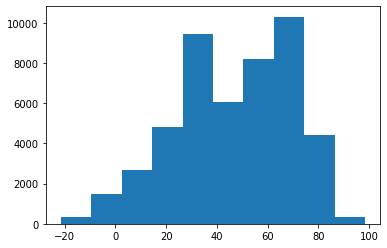

In [10]:
plt.hist(traffic_df['temp'])
plt.show()

In [11]:
traffic_df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,0,59.234,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,0,61.178,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,0,61.574,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,0,62.564,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,0,64.382,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


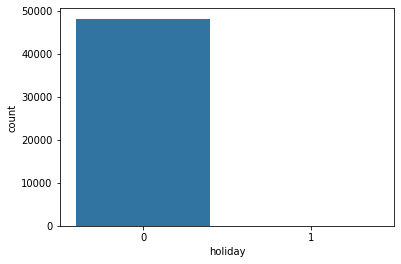

In [12]:
sns.countplot(traffic_df['holiday'])

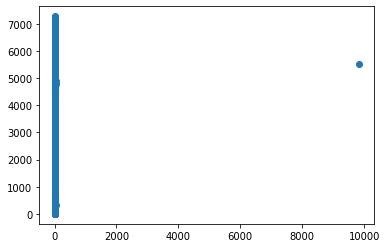

In [13]:
#scatterplot of the temperature of rainy day (rain >= .25mm) and the traffic volume
plt.scatter(traffic_df['rain_1h'], traffic_df['traffic_volume'])

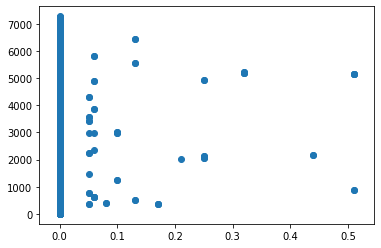

In [14]:
#scatterplot of the temperature of a snow day (snow fall > 0) and the traffic volume
plt.scatter(traffic_df['snow_1h'], traffic_df['traffic_volume'])

In [15]:
traffic_df.corr()

,holiday,temp,rain_1h,snow_1h,clouds_all,traffic_volume
holiday,1.000000,-0.008258,-0.000216,-0.000969,-0.005620,-0.042911
temp,-0.008258,1.000000,0.009484,-0.020860,-0.112859,0.132291
rain_1h,-0.000216,0.009484,1.000000,-0.000090,0.004817,0.004713
snow_1h,-0.000969,-0.020860,-0.000090,1.000000,0.027928,0.000728
clouds_all,-0.005620,-0.112859,0.004817,0.027928,1.000000,0.066819
traffic_volume,-0.042911,0.132291,0.004713,0.000728,0.066819,1.000000


In [16]:
traffic_df["temp"].min()

-21.567999999999984

In [22]:
X = traffic_df['snow_1h'] 
Y = traffic_df['traffic_volume'] 

## Create A, the augmented data array
A_X = X.to_numpy().reshape(len(X),1)
ones = np.ones([len(X),1], dtype = int)

A1 = np.append(ones, A, 1)

## Solve for w, the weight vector

w1 = np.linalg.lstsq(A1,Y, rcond=None)[0]
y_pred1 = np.matmul(A1, w1)

print("Model 1:")
print("(traffic volume) = %f  + %f * (snow in mm)" % (w1[0],w1[1]))

Model 1:
(traffic volume) = 3260.181844  + 177.072913 * (snow in mm)


In [23]:
## Create A, the augmented data array

A_X1 = X.to_numpy().reshape(len(X),1)
ones = np.ones([len(X),1], dtype= int)
squares = np.square(A_X1)

A2 = np.append(ones, A_X1,1)
A2 = np.append(A2, squares, 1)

## Solve for w2, the weight vector
w2 = np.linalg.lstsq(A2,Y, rcond=None)[0]
y_pred2 = np.matmul(A2, w2)

print("Model M2:")
print("(traffic Volume) = %f  + %f * (snow in mm) + %f * (snow in mm)^2" % (w2[0],w2[1],w2[2]))

Model M2:
(traffic Volume) = 3260.417644  + -4222.594957 * (snow in mm) + 11125.015665 * (snow in mm)^2


In [27]:
## Create a smooth set of X values for plotting the model
lineinput = np.linspace(0,0.6,100)
## Send the X values for plotting through the linear model
ones = np.ones(len(lineinput))
squares = np.square(lineinput)

A3 = np.vstack([ones, lineinput]).T
A4 = np.vstack([ones,lineinput,squares]).T

yplot1 = np.matmul(A3, w1)
yplot2 = np.matmul(A4, w2)

<function matplotlib.pyplot.show(*args, **kw)>

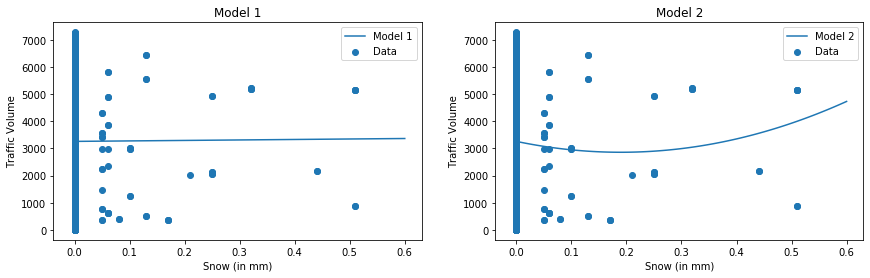

In [20]:
fig, axs = plt.subplots(1, 2)
plt.subplots_adjust(left=None, bottom=None, right=2, top=None, wspace=None, hspace=None)

plt.subplot(1,2,1)
plt.scatter(X, Y, label = "Data")
plt.plot(lineinput, yplot1, label = "Model 1")
plt.ylabel('Traffic Volume')
plt.xlabel('Snow (in mm)') 
plt.title('Model 1')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(X, Y, label = "Data")
plt.plot(lineinput, yplot2, label = "Model 2")
plt.ylabel('Traffic Volume')
plt.xlabel('Snow (in mm)')
plt.title('Model 2')
plt.legend()
plt.show 

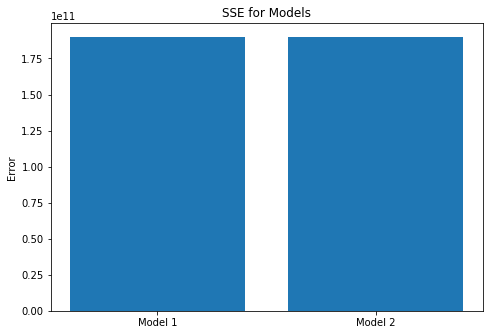

model1_SSE: 190228126514.20364 model2_SSE: 190220615141.40033


In [21]:
model1_SSE = sum((y_pred1 - Y)**2)
model2_SSE = sum((y_pred2 - Y)**2)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['Model 1', 'Model 2']
y = [model1_SSE, model2_SSE]
ax.bar(x,y)
plt.ylabel('Error')
plt.title('SSE for Models')
plt.show()
print('model1_SSE:', model1_SSE, 'model2_SSE:', model2_SSE)